In [ ]:
## Author - Satyam Ramawat, Ajit Kumar
## Analysis of United Housing Prices

In [0]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
housing = pd.read_csv("/content/drive/My Drive/da_housing.csv")

In [0]:
housing.head(5)

id                                                url  ...     long state
0  7041509589  https://auburn.craigslist.org/apa/d/columbus-s...  ... -85.0018    al
1  7047415699  https://auburn.craigslist.org/apa/d/columbus-w...  ... -85.0018    al
2  7036692376  https://auburn.craigslist.org/apa/d/auburn-uni...  ... -85.5080    al
3  7047498375  https://auburn.craigslist.org/apa/d/valley-24-...  ... -85.1749    al
4  7039492462  https://auburn.craigslist.org/apa/d/columbus-r...  ... -85.0018    al

[5 rows x 22 columns]

In [0]:
housing.tail(5)

id  ... state
384972  7026255415  ...    wy
384973  7026062818  ...    wy
384974  7026010527  ...    wy
384975  7026008298  ...    wy
384976  7025138995  ...    wy

[5 rows x 22 columns]

In [0]:
housing.describe().T

count          mean  ...           75%           max
id                       384977.0  7.040982e+09  ...  7.048426e+09  7.051292e+09
price                    384977.0  8.825722e+03  ...  1.395000e+03  2.768307e+09
sqfeet                   384977.0  1.059900e+03  ...  1.150000e+03  8.388607e+06
beds                     384977.0  1.905345e+00  ...  2.000000e+00  1.100000e+03
baths                    384977.0  1.480718e+00  ...  2.000000e+00  7.500000e+01
cats_allowed             384977.0  7.268902e-01  ...  1.000000e+00  1.000000e+00
dogs_allowed             384977.0  7.079176e-01  ...  1.000000e+00  1.000000e+00
smoking_allowed          384977.0  7.317710e-01  ...  1.000000e+00  1.000000e+00
wheelchair_access        384977.0  8.211140e-02  ...  0.000000e+00  1.000000e+00
electric_vehicle_charge  384977.0  1.287090e-02  ...  0.000000e+00  1.000000e+00
comes_furnished          384977.0  4.812755e-02  ...  0.000000e+00  1.000000e+00
lat                      383059.0  3.723349e+01  ...  4.113830e+01  1.020360e+02
long                     383059.0 -9.270063e+01  ... -8.117960e+01  1.726330e+02

[13 rows x 8 columns]

In [0]:
housing['laundry_options'].value_counts()

w/d in unit           131783
w/d hookups            75568
laundry on site        58873
laundry in bldg        36103
no laundry on site      3624
Name: laundry_options, dtype: int64

In [0]:
housing.dtypes

id                           int64
url                         object
region                      object
region_url                  object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
image_url                   object
description                 object
lat                        float64
long                       float64
state                       object
dtype: object

### **Data Preprocessing**

In [0]:
#inorder to find duplicate rows from data set
duplicate_rows = housing[housing.duplicated(subset='id',keep='first')]

In [0]:
# Total number of rows and columns
housing.shape

(384977, 22)

In [0]:
#displaying the duplicate rows
duplicate_rows

Empty DataFrame
Columns: [id, url, region, region_url, price, type, sqfeet, beds, baths, cats_allowed, dogs_allowed, smoking_allowed, wheelchair_access, electric_vehicle_charge, comes_furnished, laundry_options, parking_options, image_url, description, lat, long, state]
Index: []

In [0]:
# Rows containing duplicate data

print('number of duplicate rows:',duplicate_rows.shape)

number of duplicate rows: (0, 22)


In [0]:
# we are working on only apartment type accomodationn
housing = housing[housing['type'] == 'apartment']

In [0]:
#removing unwanted columns

housing.drop(columns=['id', 'url', 'region', 'region_url','type','description','image_url'],axis=1,inplace=True)

In [0]:
housing.columns

Index(['price', 'sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed',
       'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge',
       'comes_furnished', 'laundry_options', 'parking_options', 'lat', 'long',
       'state'],
      dtype='object')

In [0]:
#checking shapes of data

housing.shape

(318032, 15)

In [0]:
#Detecting Outliers

detect_outliers = housing.columns[0:4]

In [0]:

detect_outliers

Index(['price', 'sqfeet', 'beds', 'baths'], dtype='object')

In [0]:
detect_outliers

def outliers(data):
    for col in detect_outliers:
        fig = px.box(housing[col],y=col)
        fig.update_layout(
                            title={'text':col,'y':1,'x':0.5,'xanchor': 'center','yanchor': 'top'}
)
        fig.show()

In [0]:

outliers(detect_outliers)

## **Now removing the outliers on the basis of Boxplot**

In [0]:
#Removing the price outlier
# we are considering the lower fence on the basis of below article
#https://www.cbsnews.com/media/top-10-cheapest-us-cities-to-rent-an-apartment/
# minimum amount to rent an apartment in USA 623
#remove = housing[housing['price'] > 2190].index | housing[( housing['price'] < 623 ) & ( housing['price'] > 0 ) ].index
remove = housing[housing['price'] > 2190].index | housing[( housing['price'] < 623 )].index

In [0]:
remove

Int64Index([     2,      5,      6,     12,     15,     40,     47,     51,
                67,     74,
            ...
            384875, 384906, 384910, 384921, 384926, 384937, 384940, 384957,
            384963, 384967],
           dtype='int64', length=38895)

In [0]:
housing = housing.drop(remove)

In [0]:
housing.shape

(279137, 15)

In [0]:
remove = housing[housing['sqfeet'] > 1605].index | housing[( housing['sqfeet'] < 200 ) ].index

In [0]:
remove

Int64Index([    11,    140,    154,    306,    388,    401,    412,    455,
               487,    594,
            ...
            383252, 383463, 383673, 383796, 384153, 384154, 384380, 384681,
            384822, 384925],
           dtype='int64', length=3465)

In [0]:
housing = housing.drop(remove)

In [0]:
housing.shape

(275672, 15)

In [0]:
# Removing the beds outlier on the basis of boxplot

remove = housing[housing['beds'] > 3].index

In [0]:
remove

Int64Index([    89,    150,    371,    372,    817,   8027,   8696,   8826,
              8947,   9616,
            ...
            381616, 381911, 382335, 383054, 383415, 383699, 384398, 384454,
            384922, 384944],
           dtype='int64', length=1552)

In [0]:
housing = housing.drop(remove)

In [0]:
housing.shape

(274120, 15)

In [0]:
#removing the bathroom from the dataset

remove = housing[housing['baths'] > 3.5].index

In [0]:
remove

Int64Index([ 39480,  39560,  39679,  39825,  41501,  41632,  58556,  58580,
             58618,  60139, 161267, 198807, 199096, 345506, 345584, 345666,
            345678, 345701, 345727, 346053, 346300, 346882, 347275, 347375,
            347389, 347407],
           dtype='int64')

In [0]:
housing = housing.drop(remove)

In [0]:
housing.shape

(274094, 15)

In [0]:
remove = housing[housing['baths'] == 0].index

In [0]:
housing = housing.drop(remove)

In [0]:
housing.shape

(271705, 15)

In [0]:
remove = housing[housing['baths'] == 1.5].index

In [0]:
remove

Int64Index([   100,    337,    375,    376,    377,    398,    435,    437,
               440,    442,
            ...
            384697, 384704, 384706, 384744, 384763, 384777, 384811, 384813,
            384814, 384816],
           dtype='int64', length=15626)

In [0]:
housing = housing.drop(remove)

In [0]:
housing.shape

(256079, 15)

In [0]:
 remove = housing[housing['baths'] == 2.5].index

In [0]:


remove

Int64Index([   123,    200,    217,    218,    220,    221,    243,    246,
               248,    253,
            ...
            383105, 383195, 383267, 383336, 383444, 383518, 383786, 384368,
            384476, 384588],
           dtype='int64', length=3011)

In [0]:
housing = housing.drop(remove)

In [0]:
housing.shape

(253068, 15)

In [0]:
 remove = housing[housing['baths'] == 3.5].index

In [0]:
remove

Int64Index([ 99881,  99891,  99902, 252385, 274776, 276139, 296367, 347481,
            347595, 347620, 347655, 347923, 348025, 348796, 348801, 349323,
            349527, 349602, 349604, 349624, 349665, 359510],
           dtype='int64')

In [0]:
housing = housing.drop(remove)

In [0]:
housing.shape

(271705, 15)

## **Handling missing value**

In [0]:
# Finding the null values.
print(housing.isnull().sum())

price                           0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             57425
parking_options            109171
lat                           947
long                          947
state                           0
dtype: int64


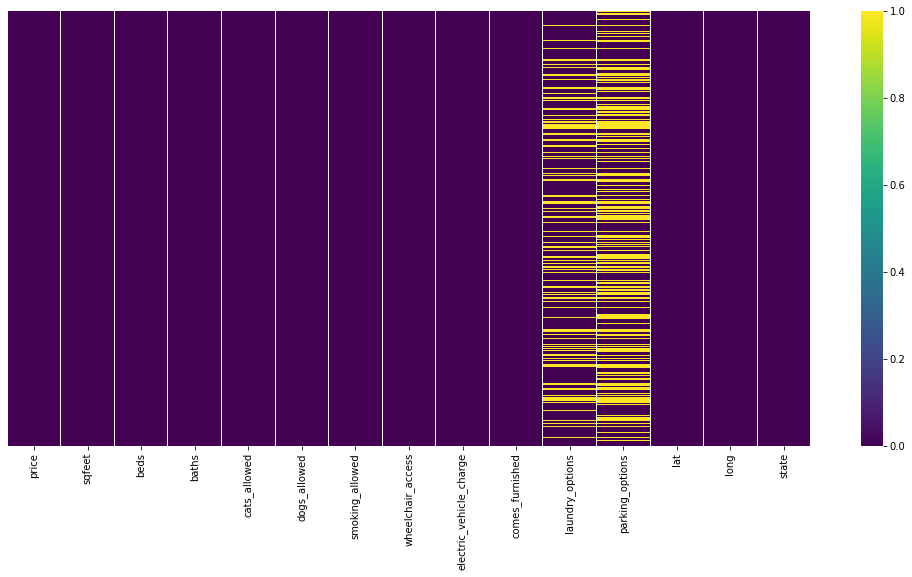

In [0]:
#drawing heatmap of null values
plt.figure(figsize=(18,8))
sns.heatmap(housing.isnull(),yticklabels=False,cmap='viridis')

## **      For House Rent**

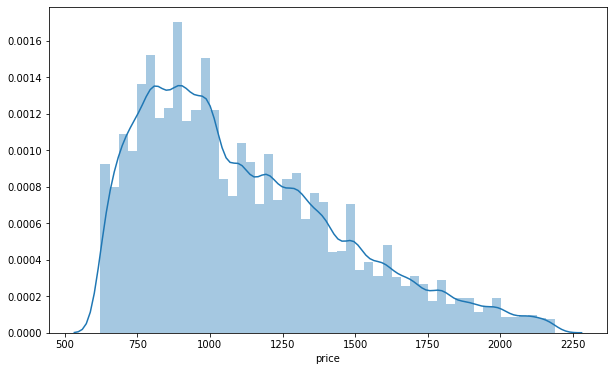

In [0]:
plt.figure(figsize=(10,6))
sns.distplot(housing['price'],bins=50)

In [0]:
# as we can see from above distplot that there are some zero values in the row now we will get the number of count of zero value

housing[housing['price']== 0]

Empty DataFrame
Columns: [price, sqfeet, beds, baths, cats_allowed, dogs_allowed, smoking_allowed, wheelchair_access, electric_vehicle_charge, comes_furnished, laundry_options, parking_options, lat, long, state]
Index: []

In [0]:
# function for filling the missing value in the dataframe

def fill_missing_val(cols):
    
    val = cols[0]
    state = cols[1]
    #ipdb.set_trace()
    if val == 0:
        if cols.index[0] == 'price':
            a = rent[rent['state'] == state]
            rent_val =  a.iloc[0][1]
            return rent_val
        elif cols.index[0] == 'beds':
            a = beds[beds['state'] == state]
            rent_val =  a.iloc[0][1]
            return rent_val 
        elif cols.index[0] == 'baths':
            a = bath[bath['state'] == state]
            rent_val =  a.iloc[0][1]
            return rent_val
    else:
        return val 

In [0]:
# filling missing value of price column
#housing['price'] = housing[['price','state']].apply(fill_missing_val,axis=1)

In [0]:
housing[housing['price'] == 0]

Empty DataFrame
Columns: [price, sqfeet, beds, baths, cats_allowed, dogs_allowed, smoking_allowed, wheelchair_access, electric_vehicle_charge, comes_furnished, laundry_options, parking_options, lat, long, state]
Index: []

## **For Square Feet**

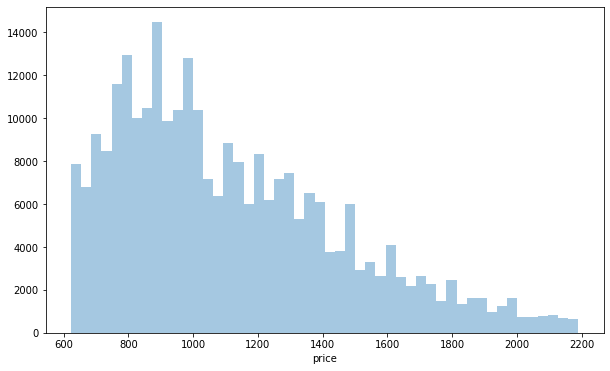

In [0]:
plt.figure(figsize=(10,6))
sns.distplot(housing['price'],kde=None,bins=50)

In [0]:
remove = housing[housing['sqfeet']== 0].index
remove

Int64Index([], dtype='int64')

In [0]:
#since there are only 7 records which is having the missing values in square feet column that is why we are deleting the recoed 
# as this is very less as compared to the number of records we are having



In [0]:
housing

price  sqfeet  beds  baths  ...     parking_options      lat      long  state
0         699    1013     3    1.0  ...                 NaN  32.4352  -85.0018     al
1         636     828     2    1.0  ...                 NaN  32.4352  -85.0018     al
3         825    1107     2    2.0  ...                 NaN  32.8113  -85.1749     al
4         624     828     2    1.0  ...                 NaN  32.4352  -85.0018     al
7         930    1252     3    2.0  ...  off-street parking  32.8113  -85.1749     al
...       ...     ...   ...    ...  ...                 ...      ...       ...    ...
384968    824    1174     3    2.0  ...             carport  44.8064 -106.9900     wy
384969   1120     850     2    2.0  ...  off-street parking  41.3136 -105.5550     wy
384974    899     950     2    1.0  ...  off-street parking  41.5961 -109.2540     wy
384975    699     650     1    1.0  ...  off-street parking  41.5961 -109.2540     wy
384976   1685     470     0    1.0  ...  off-street parking  43.4679 -110.7900     wy

[271705 rows x 15 columns]

## **For Beds**

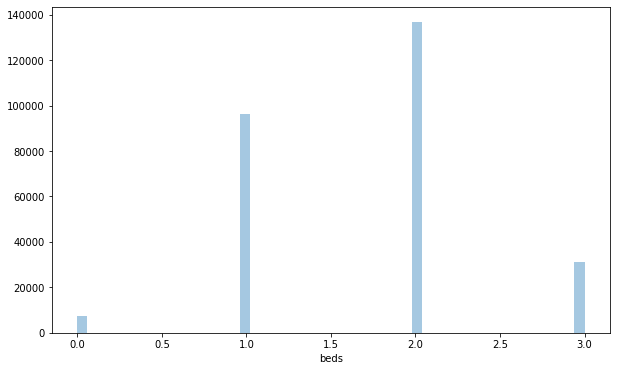

In [0]:
plt.figure(figsize=(10,6))
sns.distplot(housing['beds'],kde=None,bins=50)

In [0]:
#as beds can be zero because in an apartment it is possible that there coulb be no bed

housing[housing['beds']== 0]

price  sqfeet  beds  baths  ...     parking_options      lat      long  state
631      1169     587     0    1.0  ...     attached garage  33.5062  -86.8003     al
944       785     538     0    1.0  ...                 NaN  33.4272  -86.6678     al
1214      780     583     0    1.0  ...                 NaN  33.4272  -86.6678     al
1215      780     583     0    1.0  ...                 NaN  33.4272  -86.6678     al
1407     1595    1000     0    1.0  ...      street parking  33.5158  -86.8011     al
...       ...     ...   ...    ...  ...                 ...      ...       ...    ...
384308   1260     530     0    1.0  ...     attached garage  43.0528  -87.9353     wi
384424    850     321     0    1.0  ...  off-street parking  43.5000  -87.8197     wi
384546   1000     567     0    1.0  ...     attached garage  43.7499  -87.7110     wi
384879    800     700     0    1.0  ...  off-street parking  42.8364 -108.7400     wy
384976   1685     470     0    1.0  ...  off-street parking  43.4679 -110.7900     wy

[7520 rows x 15 columns]

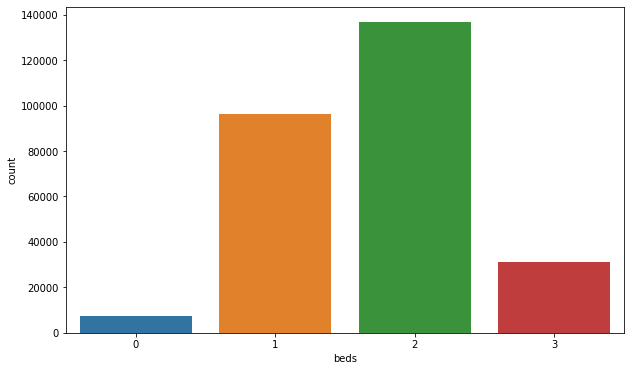

In [0]:
plt.figure(figsize=(10,6))
sns.countplot(x='beds',data=housing)

#maximum number of people in USA have apartment with 2 bedroom in it

In [0]:
# filling missing value of beds column
# right now we are commenting this part as per our assumptionn that0 bed is not a missing value
##housing['beds'] = housing[['beds','state']].apply(fill_missing_val,axis=1)

## **For Baths**

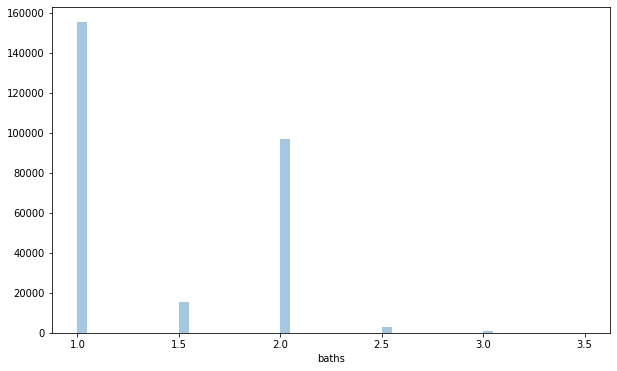

In [0]:
plt.figure(figsize=(10,6))
sns.distplot(housing['baths'],kde=None,bins=50)

In [0]:

housing[housing['baths']== 0]

Empty DataFrame
Columns: [price, sqfeet, beds, baths, cats_allowed, dogs_allowed, smoking_allowed, wheelchair_access, electric_vehicle_charge, comes_furnished, laundry_options, parking_options, lat, long, state]
Index: []

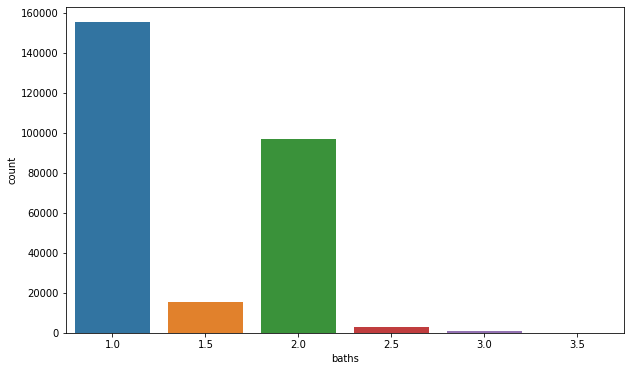

In [0]:
plt.figure(figsize=(10,6))
sns.countplot(x='baths',data=housing)

#maximum number of people in USA have apartment with 1 bedroom in it

In [0]:
# filling missing value of beds column
#housing['baths'] = housing[['baths','state']].apply(fill_missing_val,axis=1)

In [0]:
housing.isnull().sum()

price                           0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             57425
parking_options            109171
lat                           947
long                          947
state                           0
dtype: int64

now for filling the missing value in longitude and latitude we will be using the KNN algorithm for filling the missing value

In [0]:
from sklearn.impute import KNNImputer

In [0]:
housing[housing['long'].isnull()]

price  sqfeet  beds  baths  ...     parking_options  lat  long  state
975       799     703     1    1.0  ...  off-street parking  NaN   NaN     al
4389      739     640     1    1.0  ...  off-street parking  NaN   NaN     al
4825      895     800     1    1.0  ...  off-street parking  NaN   NaN     al
6784     1150     800     1    1.0  ...             carport  NaN   NaN     al
6850      925     892     2    2.0  ...  off-street parking  NaN   NaN     al
...       ...     ...   ...    ...  ...                 ...  ...   ...    ...
383644   1355    1350     2    2.0  ...                 NaN  NaN   NaN     wi
383774    670     753     1    1.0  ...  off-street parking  NaN   NaN     wi
383837    750     985     2    2.0  ...  off-street parking  NaN   NaN     wi
383846    630     553     1    1.0  ...  off-street parking  NaN   NaN     wi
384211    740     950     2    1.0  ...     attached garage  NaN   NaN     wi

[947 rows x 15 columns]

In [0]:
housing

price  sqfeet  beds  baths  ...     parking_options      lat      long  state
0         699    1013     3    1.0  ...                 NaN  32.4352  -85.0018     al
1         636     828     2    1.0  ...                 NaN  32.4352  -85.0018     al
3         825    1107     2    2.0  ...                 NaN  32.8113  -85.1749     al
4         624     828     2    1.0  ...                 NaN  32.4352  -85.0018     al
7         930    1252     3    2.0  ...  off-street parking  32.8113  -85.1749     al
...       ...     ...   ...    ...  ...                 ...      ...       ...    ...
384968    824    1174     3    2.0  ...             carport  44.8064 -106.9900     wy
384969   1120     850     2    2.0  ...  off-street parking  41.3136 -105.5550     wy
384974    899     950     2    1.0  ...  off-street parking  41.5961 -109.2540     wy
384975    699     650     1    1.0  ...  off-street parking  41.5961 -109.2540     wy
384976   1685     470     0    1.0  ...  off-street parking  43.4679 -110.7900     wy

[271705 rows x 15 columns]

In [0]:
new = housing[['lat','long']].copy()

In [0]:
new

lat      long
0       32.4352  -85.0018
1       32.4352  -85.0018
3       32.8113  -85.1749
4       32.4352  -85.0018
7       32.8113  -85.1749
...         ...       ...
384968  44.8064 -106.9900
384969  41.3136 -105.5550
384974  41.5961 -109.2540
384975  41.5961 -109.2540
384976  43.4679 -110.7900

[271705 rows x 2 columns]

In [0]:
#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4959387/ here you will get research paper about KNN imputation
imputer = KNNImputer(n_neighbors=5)
df_new = imputer.fit_transform(new)

In [0]:
df_new

array([[  32.4352,  -85.0018],
       [  32.4352,  -85.0018],
       [  32.8113,  -85.1749],
       ...,
       [  41.5961, -109.254 ],
       [  41.5961, -109.254 ],
       [  43.4679, -110.79  ]])

In [0]:
new = pd.DataFrame(data=df_new,columns=['lat','long'])

In [0]:
new

lat      long
0       32.4352  -85.0018
1       32.4352  -85.0018
2       32.8113  -85.1749
3       32.4352  -85.0018
4       32.8113  -85.1749
...         ...       ...
271700  44.8064 -106.9900
271701  41.3136 -105.5550
271702  41.5961 -109.2540
271703  41.5961 -109.2540
271704  43.4679 -110.7900

[271705 rows x 2 columns]

In [0]:
housing = housing.drop(['lat','long'],axis=1)

In [0]:
new_housing = pd.concat([housing,new],axis=1)

In [0]:
new_housing

price  sqfeet  beds  baths  ...     parking_options  state      lat     long
0        699.0  1013.0   3.0    1.0  ...                 NaN     al  32.4352 -85.0018
1        636.0   828.0   2.0    1.0  ...                 NaN     al  32.4352 -85.0018
2          NaN     NaN   NaN    NaN  ...                 NaN    NaN  32.8113 -85.1749
3        825.0  1107.0   2.0    2.0  ...                 NaN     al  32.4352 -85.0018
4        624.0   828.0   2.0    1.0  ...                 NaN     al  32.8113 -85.1749
...        ...     ...   ...    ...  ...                 ...    ...      ...      ...
384968   824.0  1174.0   3.0    2.0  ...             carport     wy      NaN      NaN
384969  1120.0   850.0   2.0    2.0  ...  off-street parking     wy      NaN      NaN
384974   899.0   950.0   2.0    1.0  ...  off-street parking     wy      NaN      NaN
384975   699.0   650.0   1.0    1.0  ...  off-street parking     wy      NaN      NaN
384976  1685.0   470.0   0.0    1.0  ...  off-street parking     wy      NaN      NaN

[354566 rows x 15 columns]

In [0]:
housing = new_housing

In [0]:
housing.drop(columns=['lat','long'],axis=1,inplace=True)

In [0]:
housing

price  sqfeet  beds  ...  laundry_options     parking_options  state
0        699.0  1013.0   3.0  ...              NaN                 NaN     al
1        636.0   828.0   2.0  ...              NaN                 NaN     al
2          NaN     NaN   NaN  ...              NaN                 NaN    NaN
3        825.0  1107.0   2.0  ...      w/d hookups                 NaN     al
4        624.0   828.0   2.0  ...              NaN                 NaN     al
...        ...     ...   ...  ...              ...                 ...    ...
384968   824.0  1174.0   3.0  ...      w/d in unit             carport     wy
384969  1120.0   850.0   2.0  ...      w/d in unit  off-street parking     wy
384974   899.0   950.0   2.0  ...      w/d hookups  off-street parking     wy
384975   699.0   650.0   1.0  ...      w/d hookups  off-street parking     wy
384976  1685.0   470.0   0.0  ...  laundry on site  off-street parking     wy

[354566 rows x 13 columns]

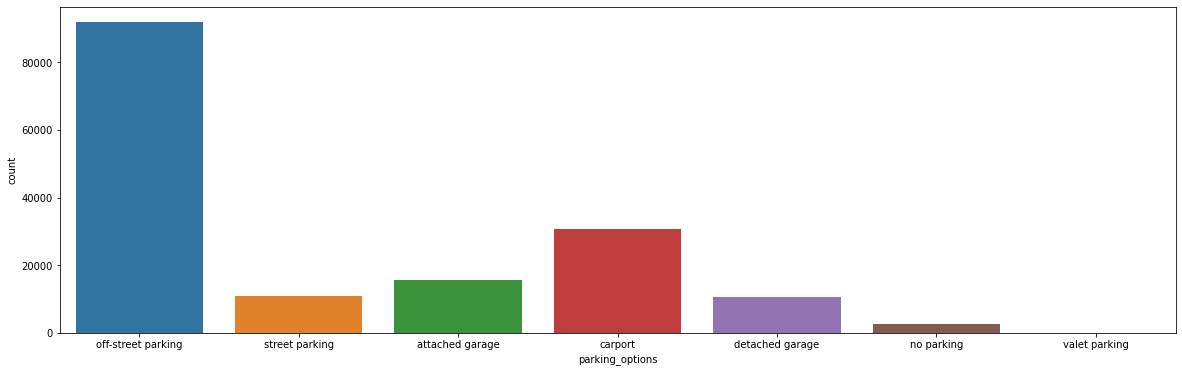

In [0]:
plt.figure(figsize=(20,6))
sns.countplot(x='parking_options',data=housing)

In [0]:
# we are removing row of missing data from both laundry_options and parking_options

housing.dropna(inplace=True)
#housing.drop(['parking_options'], axis=1)

In [0]:
housing.shape

(157971, 13)

### **EDA**

In [0]:
#This shows us the number of non-null cells for each column.
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157971 entries, 7 to 384976
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    157971 non-null  float64
 1   sqfeet                   157971 non-null  float64
 2   beds                     157971 non-null  float64
 3   baths                    157971 non-null  float64
 4   cats_allowed             157971 non-null  float64
 5   dogs_allowed             157971 non-null  float64
 6   smoking_allowed          157971 non-null  float64
 7   wheelchair_access        157971 non-null  float64
 8   electric_vehicle_charge  157971 non-null  float64
 9   comes_furnished          157971 non-null  float64
 10  laundry_options          157971 non-null  object 
 11  parking_options          157971 non-null  object 
 12  state                    157971 non-null  object 
dtypes: float64(10), object(3)
memory usage: 16.9+ MB


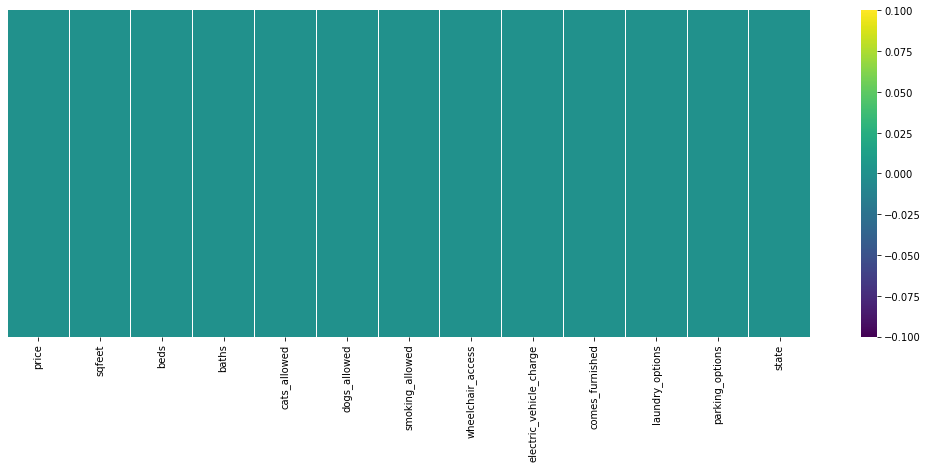

In [0]:
#drawing heatmap of null values
plt.figure(figsize=(18,6))
sns.heatmap(housing.isnull(),yticklabels=False,cmap='viridis')

In [0]:
#Creating Dummies variable
laundry = pd.get_dummies(housing['laundry_options'],drop_first=True)

In [0]:
parking = pd.get_dummies(housing['parking_options'],drop_first=True)

In [0]:
housing.drop(columns=['laundry_options','parking_options'],axis=1,inplace=True)

In [0]:
new_housing = pd.concat([housing,laundry,parking],axis = 1)

In [0]:
housing = new_housing

In [0]:
parking

carport  detached garage  ...  street parking  valet parking
7             0                0  ...               0              0
9             0                0  ...               0              0
10            0                0  ...               0              0
17            0                0  ...               1              0
18            0                0  ...               1              0
...         ...              ...  ...             ...            ...
384968        1                0  ...               0              0
384969        0                0  ...               0              0
384974        0                0  ...               0              0
384975        0                0  ...               0              0
384976        0                0  ...               0              0

[157971 rows x 6 columns]

In [0]:
laundry

laundry on site  no laundry on site  w/d hookups  w/d in unit
7                     0                   0            1            0
9                     0                   0            1            0
10                    0                   0            1            0
17                    1                   0            0            0
18                    1                   0            0            0
...                 ...                 ...          ...          ...
384968                0                   0            0            1
384969                0                   0            0            1
384974                0                   0            1            0
384975                0                   0            1            0
384976                1                   0            0            0

[157971 rows x 4 columns]

In [0]:
housing

price  sqfeet  beds  ...  off-street parking  street parking  valet parking
7        930.0  1252.0   3.0  ...                   1               0              0
9        895.0  1118.0   2.0  ...                   1               0              0
10       705.0   760.0   1.0  ...                   1               0              0
17       850.0  1047.0   2.0  ...                   0               1              0
18      1145.0  1572.0   3.0  ...                   0               1              0
...        ...     ...   ...  ...                 ...             ...            ...
384968   824.0  1174.0   3.0  ...                   0               0              0
384969  1120.0   850.0   2.0  ...                   1               0              0
384974   899.0   950.0   2.0  ...                   1               0              0
384975   699.0   650.0   1.0  ...                   1               0              0
384976  1685.0   470.0   0.0  ...                   1               0              0

[157971 rows x 21 columns]

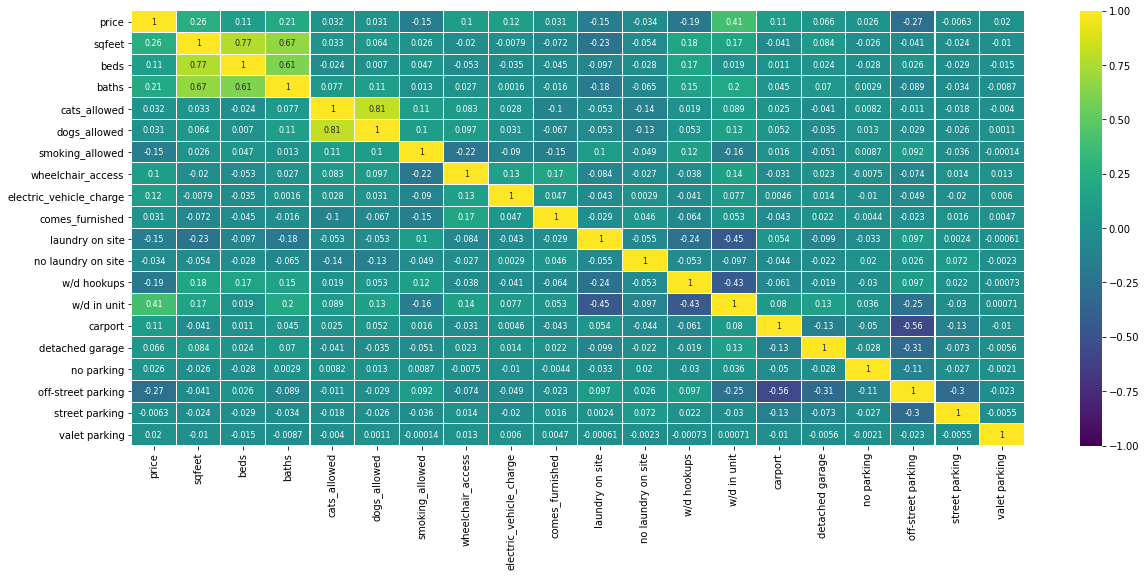

In [0]:
#Heat Maps is a type of plot which is necessary when we need to find the dependent variables. 
#One of the best way to find the relationship between the features can be done using heat maps. 

plt.figure(figsize=(20,8))
sns.heatmap(housing.corr(),cmap='viridis',vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True,annot_kws={'size':8})


In [0]:
housing['price'] = np.log1p(housing['price'])

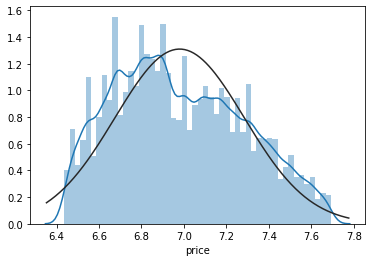

In [0]:
from scipy.stats import norm
sns.distplot(housing['price'],fit=norm,kde=True)

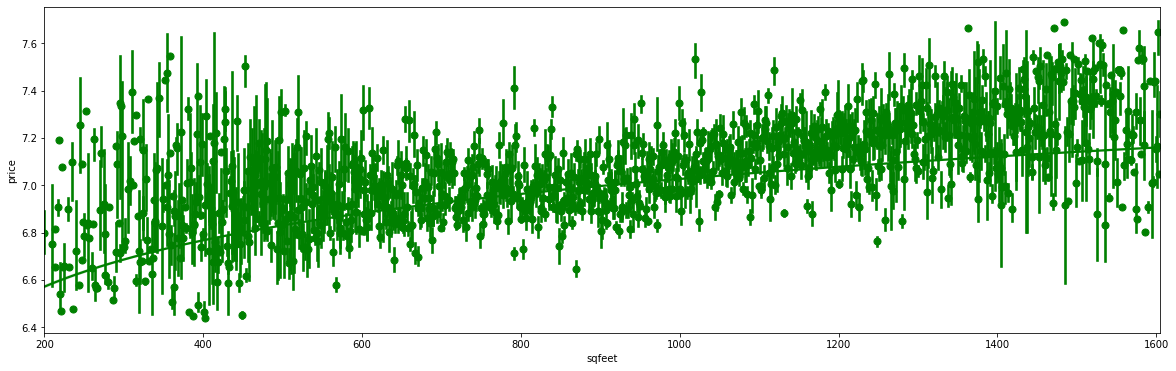

In [0]:
#We generally use regplot plots to find the correlation between two variable.
#Here the regplot plots are plotted between ( sqfeet and Price) and we can see 
#the plot below. With the plot given below, we can easily draw a trend line. 
#These features provide a good scattering of points.and here you can see that as 
# sqfeet increase it increase the price also and there is an upward trend prsent

plt.figure(figsize=(20,6))
sns.regplot(x='sqfeet',y='price',data=housing,color="g",x_estimator=np.mean, logx=True)

<Figure size 1440x432 with 0 Axes>

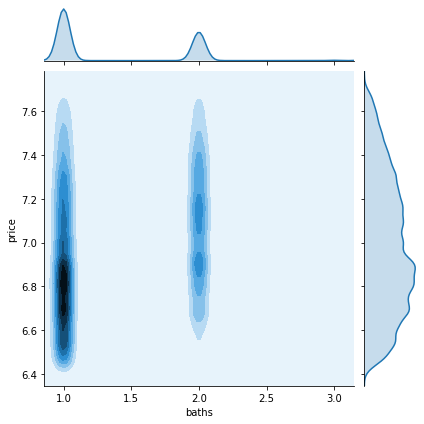

In [0]:
plt.figure(figsize=(20,6))
sns.jointplot(x = 'baths',y = 'price' ,data=housing,kind='kde')

<Figure size 1440x432 with 0 Axes>

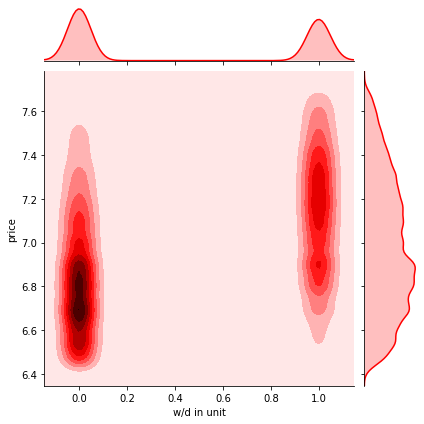

In [0]:
#These apartments also have on-site laundry facilities or units with just washer and dryer connections.
# and we can see that aparment having the washer and dryer facility have more rent than the
# house not having washer and dryer facility
plt.figure(figsize=(20,6))
sns.jointplot(x='w/d in unit',y = 'price',data=housing,kind='kde',color='red')

In [0]:
housing.columns

Index(['price', 'sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed',
       'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge',
       'comes_furnished', 'state', 'laundry on site', 'no laundry on site',
       'w/d hookups', 'w/d in unit', 'carport', 'detached garage',
       'no parking', 'off-street parking', 'street parking', 'valet parking'],
      dtype='object')

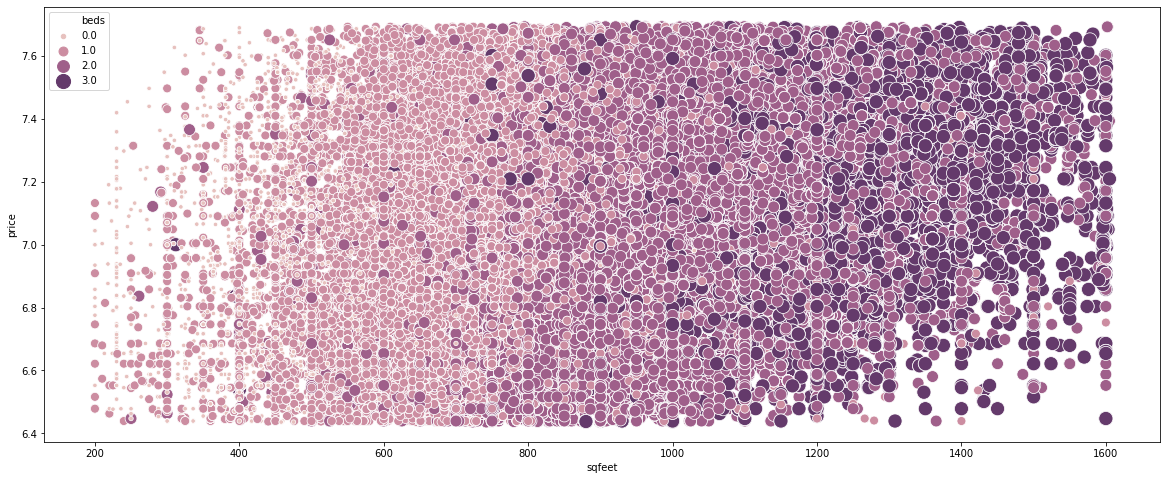

In [0]:
plt.figure(figsize=(20,8))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="sqfeet", y="price",
                     hue="beds", size="beds",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=housing)

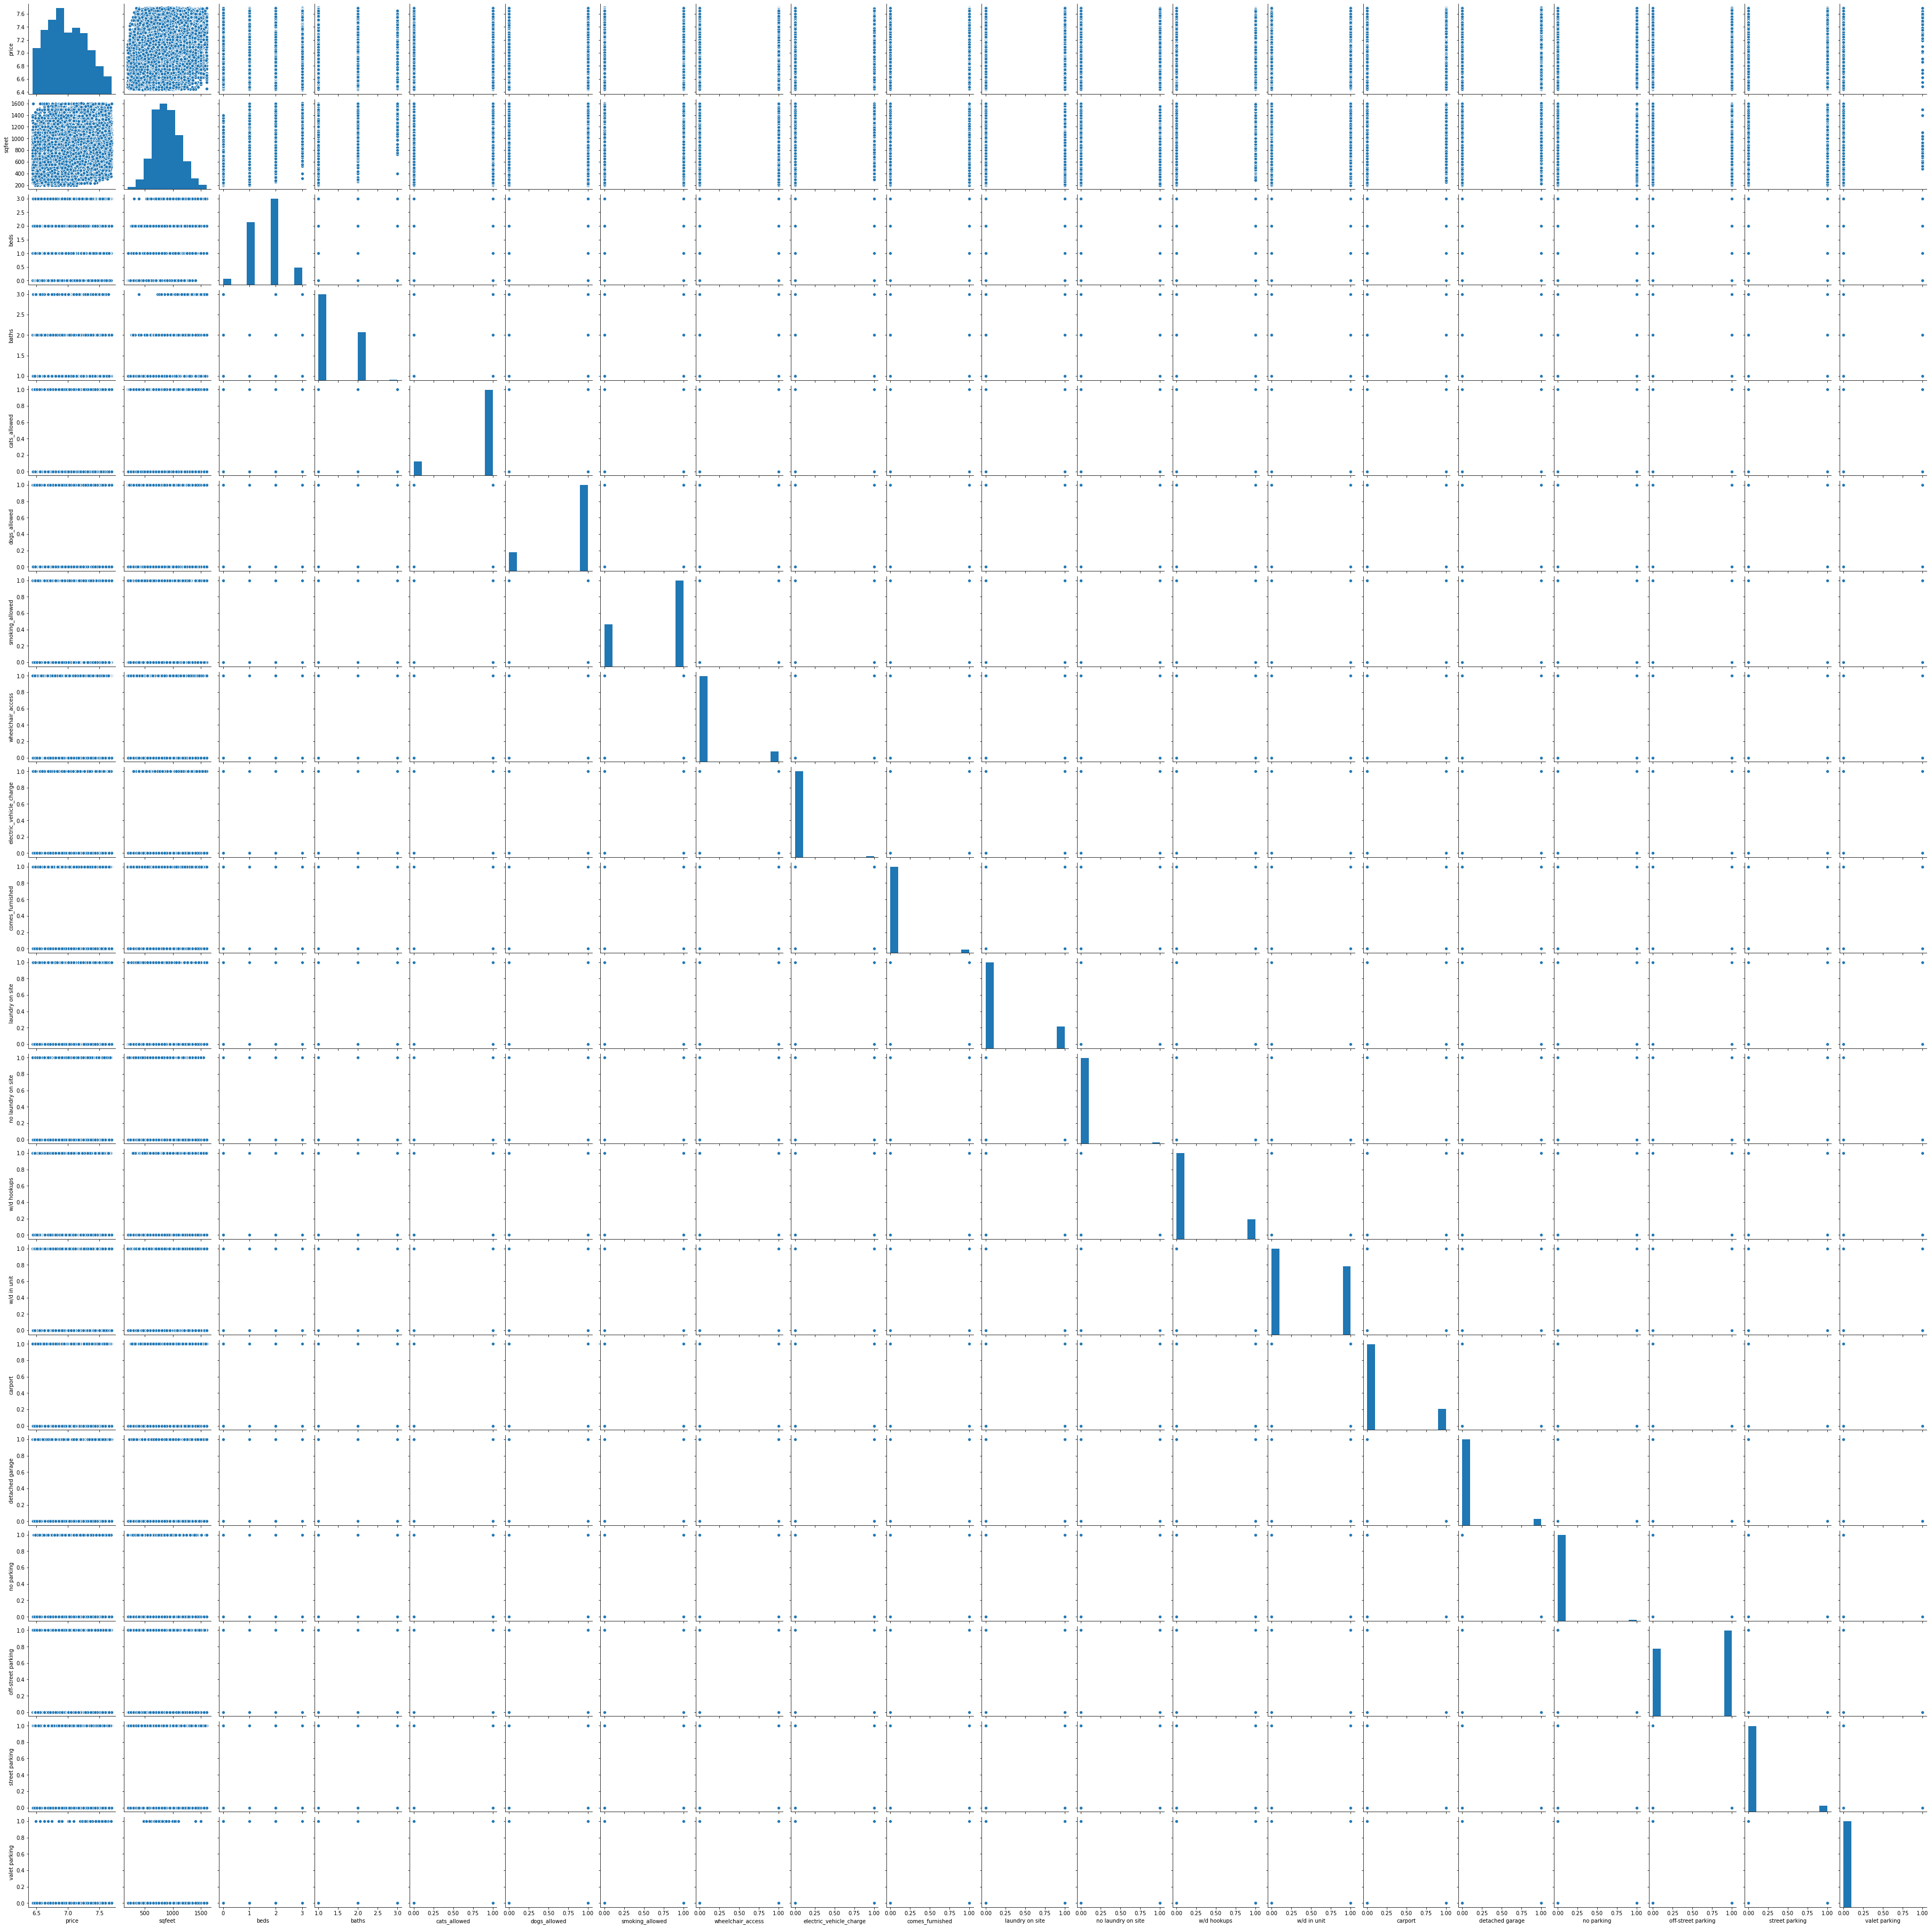

In [0]:
a = housing.drop(['state'],axis=1)
sns.pairplot(a)

In [0]:
from sklearn.model_selection import  train_test_split,cross_val_score

In [0]:
housing.columns

Index(['price', 'sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed',
       'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge',
       'comes_furnished', 'state', 'laundry on site', 'no laundry on site',
       'w/d hookups', 'w/d in unit', 'carport', 'detached garage',
       'no parking', 'off-street parking', 'street parking', 'valet parking'],
      dtype='object')

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
x_temp = housing.drop(['state','price'],axis=1)
scaler.fit(x_temp)
X = scaler.transform(x_temp)

#X = housing.drop(['state','price'],axis=1)

In [0]:
y_temp = housing['price']
y_temp = pd.DataFrame(data = y_temp)
scaler.fit(y_temp)
y = scaler.transform(y_temp)

#y = housing['price']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
# create instance of linear regression model
lm = LinearRegression()

In [0]:
# for checking model is fit or not on trainig data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print(lm.intercept_)

[0.00036674]


In [0]:
lm.coef_

array([[ 0.2846329 , -0.09481689,  0.04054105,  0.06472872, -0.06583106,
        -0.08512884,  0.01327261,  0.06317752,  0.00484408,  0.05235567,
         0.01083508, -0.03990871,  0.30845109, -0.08605213, -0.10457568,
        -0.01874513, -0.28544416, -0.10019231,  0.01263376]])

In [0]:
#pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

## **Predictions**

In [0]:
predictions = lm.predict(X_test)

In [0]:
predictions

array([[-0.80971841],
       [ 0.717359  ],
       [-0.58952216],
       ...,
       [-0.00534457],
       [-0.62030345],
       [ 0.63011249]])

In [0]:
y_test

array([[-1.2866508 ],
       [ 1.10866397],
       [-1.2866508 ],
       ...,
       [-0.25855035],
       [-1.74704028],
       [-0.23220902]])

## **Predictions from our Model**

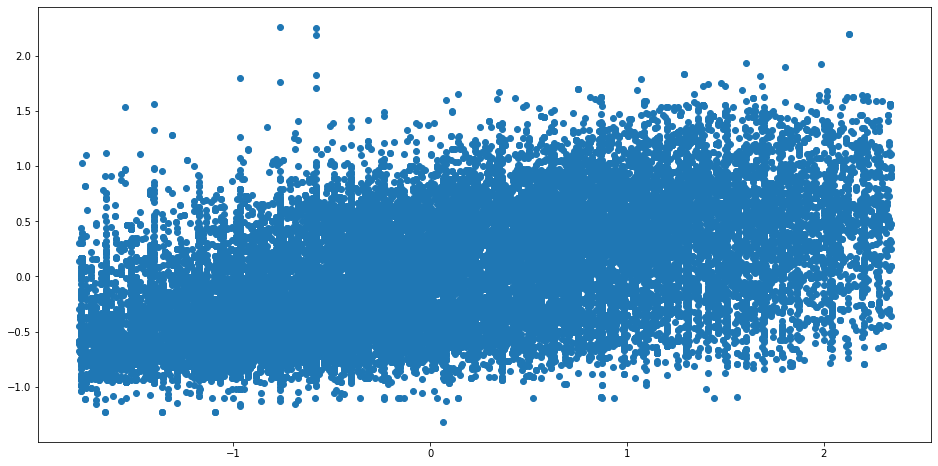

In [0]:
plt.figure(figsize=(16,8))
plt.scatter(y_test,predictions)

\## **Residual Histogram**

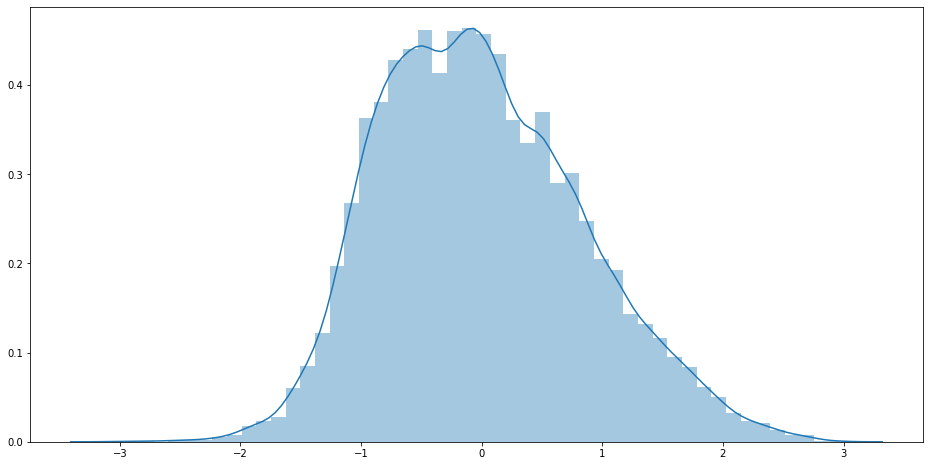

In [0]:
plt.figure(figsize=(16,8))
sns.distplot((y_test - predictions),bins=50)

In [0]:
# printing evaluation metrics for regression model which will be MAE,MSE,RMSE
from sklearn import metrics

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.6822779626221808
MSE: 0.7127349326550005
RMSE: 0.8442363014316552


In [0]:
LMAE = metrics.mean_absolute_error(y_test, predictions)
LMSE = metrics.mean_squared_error(y_test, predictions)
LRMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))

In [0]:
# Rsquare
metrics.explained_variance_score(y_test,predictions)

0.28105083050881063

In [0]:
from sklearn.metrics import r2_score

print("Test acc: ", r2_score(y_test,predictions))

Test acc:  0.2810486597935026


In [0]:
# train model score 
lm.score(X_train,y_train)

0.2881005712823882

In [0]:
# test model score
metrics.explained_variance_score(y_test,predictions)

0.28105083050881063

In [0]:
x_temp.columns

Index(['sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed',
       'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge',
       'comes_furnished', 'laundry on site', 'no laundry on site',
       'w/d hookups', 'w/d in unit', 'carport', 'detached garage',
       'no parking', 'off-street parking', 'street parking', 'valet parking'],
      dtype='object')

In [0]:
LR2 = metrics.explained_variance_score(y_test,predictions)

In [0]:
coef = pd.DataFrame(lm.coef_,columns=x_temp.columns)
coef

sqfeet      beds  ...  street parking  valet parking
0  0.284633 -0.094817  ...       -0.100192       0.012634

[1 rows x 19 columns]

### **Random Forest Regressor**

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
RF = RandomForestRegressor(n_estimators=100, max_features='sqrt')

In [0]:
RF.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
output = RF.predict(X_test)

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, output))
print('MSE:', metrics.mean_squared_error(y_test, output))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,output)))

MAE: 0.36248537153514754
MSE: 0.3597374555420235
RMSE: 0.5997811730473236


In [0]:
# train model score 
RF.score(X_train,y_train)

0.8027209928749455

In [0]:
RF.score(y_test,output)

NameError: ignored

In [0]:
# test model score
metrics.explained_variance_score(y_test,output)

0.6371649070539107

## **Random Forest Accuracy after Cross Validations**

In [0]:
cross_val_score(RF, X_train, y_train, cv=5, scoring='r2')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.6/dist-packages/s

array([0.62859813, 0.61428161, 0.62608132, 0.61529219, 0.61511627])

In [0]:
Output3 = RF.predict(X_test)

In [0]:
metrics.explained_variance_score(y_test,Output3)

0.6371649070539107

In [0]:
RR2 = metrics.explained_variance_score(y_test,Output3)

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test,Output3))
print('MSE:', metrics.mean_squared_error(y_test,Output3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,Output3)))

MAE: 0.36248537153514754
MSE: 0.3597374555420235
RMSE: 0.5997811730473236


In [0]:
RMAE =  metrics.mean_absolute_error(y_test,Output3)
RMSE = metrics.mean_squared_error(y_test,Output3)
RRMSE = np.sqrt(metrics.mean_squared_error(y_test,Output3))

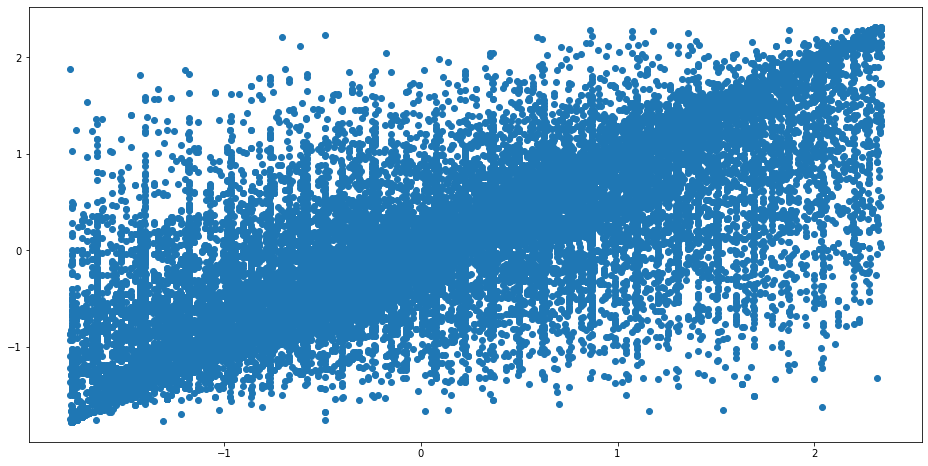

In [0]:
plt.figure(figsize=(16,8))
plt.scatter(y_test,Output3)

In [0]:
plt.figure(figsize=(16,8))
sns.distplot((y_test - Output3),bins=50)


### **Gradient Booster Regressor**

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ShuffleSplit

In [0]:
gbrt=GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
gbrt.fit(X_train, y_train) 
y_pred=gbrt.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [0]:
print('R-squared for Train: %.2f' %gbrt.score(X_train, y_train) )
print('R-squared for Test: %.2f' %gbrt.score(X_test, y_test) )

R-squared for Train: 0.45
R-squared for Test: 0.44


In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.58321257108561
MSE: 0.5633740328573451
RMSE: 0.7505824623966011


Gradient Boosting algorithm with cross validation 

In [0]:
cross_val_score(gbrt, X_train, y_train, cv=5, scoring='r2')

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:


array([0.42663848, 0.43096653, 0.43369561, 0.42896192, 0.4324808 ])

In [0]:
gbrt_pred=gbrt.predict(X_test)

In [0]:
metrics.explained_variance_score(y_test,gbrt_pred)

0.44057882777947166

In [0]:
GR2 = metrics.explained_variance_score(y_test,gbrt_pred)

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test,gbrt_pred))
print('MSE:', metrics.mean_squared_error(y_test,gbrt_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,gbrt_pred)))

MAE: 0.58321257108561
MSE: 0.5633740328573451
RMSE: 0.7505824623966011


In [0]:
GMAE = metrics.mean_absolute_error(y_test,gbrt_pred)
GMSE = metrics.mean_squared_error(y_test,gbrt_pred)
GRMSE = np.sqrt(metrics.mean_squared_error(y_test,gbrt_pred))

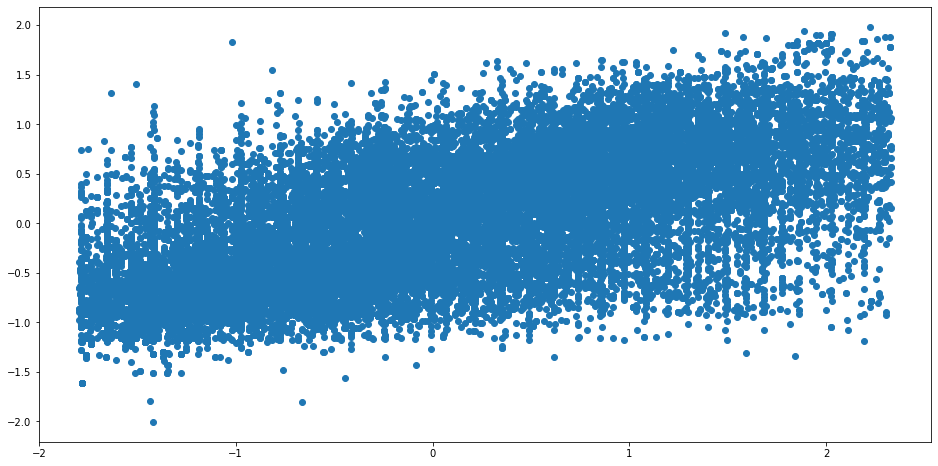

In [0]:
plt.figure(figsize=(16,8))
plt.scatter(y_test,gbrt_pred)

## **SVM**

In [0]:
from sklearn.svm import SVR

In [0]:
svr = SVR(kernel='linear')

In [0]:
svr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
svr_prediction = svr.predict(X_test)

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test,svr_prediction))
print('MSE:', metrics.mean_squared_error(y_test,svr_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,svr_prediction)))

MAE: 0.6785804873836463
MSE: 0.7283230613013656
RMSE: 0.8534184561522944


In [0]:
# train model score 
svr.score(X_train,y_train)

0.27153129904660045

In [0]:
# test model score
metrics.explained_variance_score(y_test,svr_prediction)

0.28089083913831026

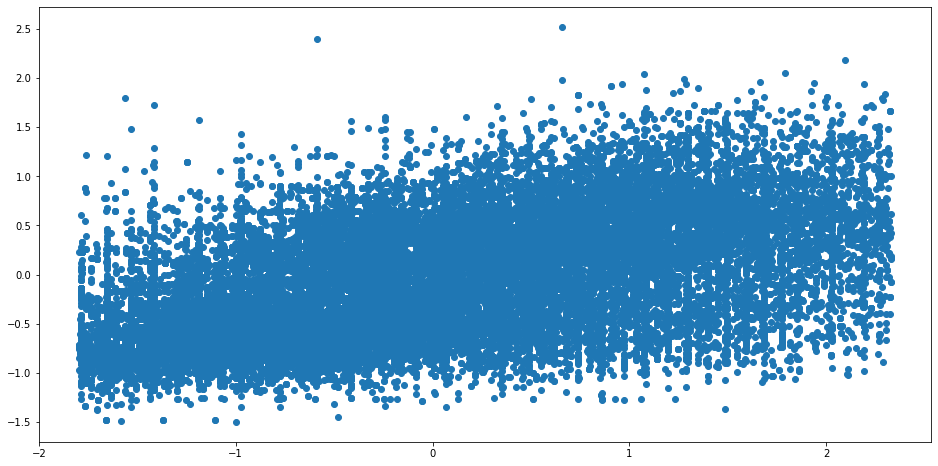

In [0]:
plt.figure(figsize=(16,8))
plt.scatter(y_test,svr_prediction)

### **SVM with cross validation**

In [0]:
cross_val_score(svr, X_train, y_train, cv=5, scoring='r2')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConv

array([0.27134358, 0.26883105, 0.26706626, 0.27867409, 0.26936574])

In [0]:
svr_predict = svr.predict(X_test)

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test,svr_predict))
print('MSE:', metrics.mean_squared_error(y_test,svr_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,svr_predict)))

MAE: 0.6785804873836463
MSE: 0.7283230613013656
RMSE: 0.8534184561522944


In [0]:
SMAE = metrics.mean_absolute_error(y_test,svr_predict)
SMSE = metrics.mean_squared_error(y_test,svr_predict)
SRMSE = np.sqrt(metrics.mean_squared_error(y_test,svr_predict))

In [0]:
# train model score 
svr.score(X_train,y_train)

0.27153129904660045

In [0]:
# test model score
metrics.explained_variance_score(y_test,svr_predict)

0.28089083913831026

In [0]:
SR2 = metrics.explained_variance_score(y_test,svr_predict)

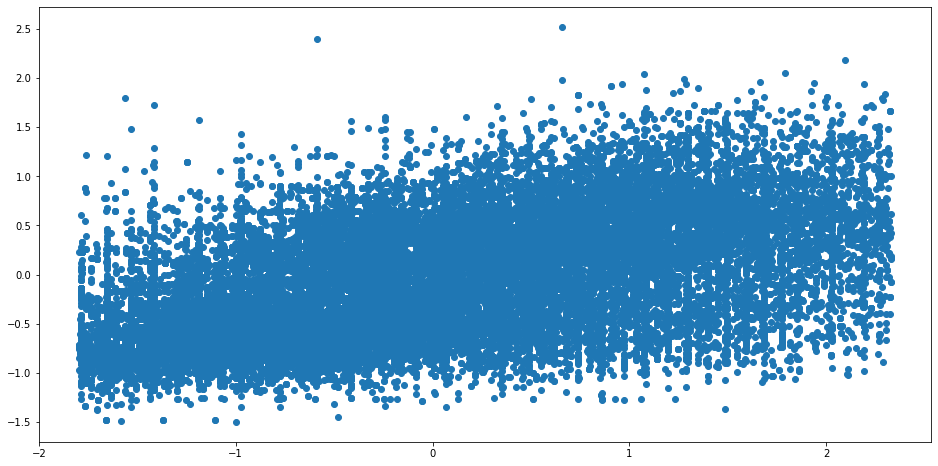

In [0]:
plt.figure(figsize=(16,8))
plt.scatter(y_test,svr_predict)

### **Decision Tree Regressor**

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
dctr = DecisionTreeRegressor()

In [0]:
dctr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
dctr_prediction = dctr.predict(X_test)

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test,dctr_prediction))
print('MSE:', metrics.mean_squared_error(y_test,dctr_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,dctr_prediction)))

MAE: 0.37534612177837273
MSE: 0.4290800836941641
RMSE: 0.6550420472719015


In [0]:
# train model score 
dctr.score(X_train,y_train)

0.8160921371904812

In [0]:
# test model score
metrics.explained_variance_score(y_test,dctr_prediction)

0.5736569253667365

In [0]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,dctr_prediction)

NameError: ignored

### **Decission Tree cross validation**

In [0]:
cross_val_score(dctr, X_train, y_train, cv=10, scoring='r2')

array([0.55547574, 0.55107483, 0.57036664, 0.55973823, 0.57339653,
       0.56696128, 0.54274203, 0.56323697, 0.55288155, 0.55899574])

In [0]:
dctr_predict = dctr.predict(X_test)

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test,dctr_predict))
print('MSE:', metrics.mean_squared_error(y_test,dctr_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,dctr_predict)))

MAE: 0.37534612177837273
MSE: 0.4290800836941641
RMSE: 0.6550420472719015


In [0]:
DMAE = metrics.mean_absolute_error(y_test,dctr_predict)
DMSE = metrics.mean_squared_error(y_test,dctr_predict)
DRMSE = np.sqrt(metrics.mean_squared_error(y_test,dctr_predict))

In [0]:
metrics.explained_variance_score(y_test,dctr_predict)

0.5736569253667365

In [0]:
DR2 = metrics.explained_variance_score(y_test,dctr_predict)

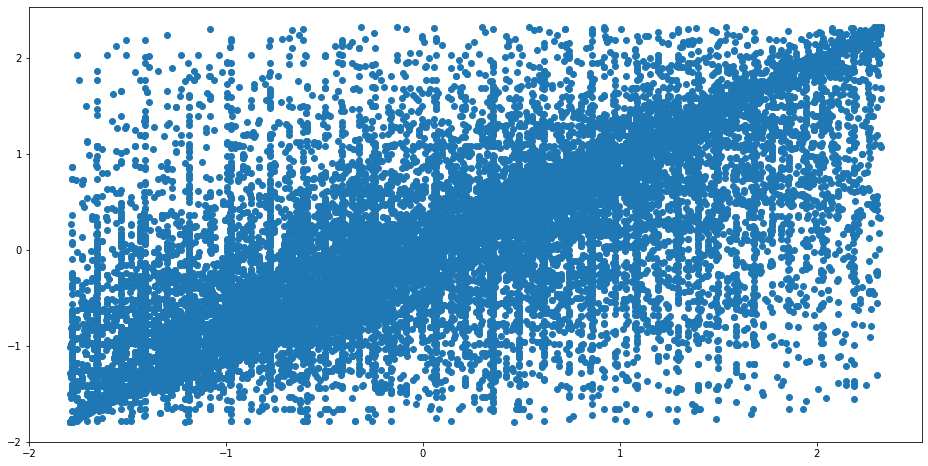

In [0]:
plt.figure(figsize=(16,8))
plt.scatter(y_test,dctr_predict)

## **Creating Data Frame of all Result**

In [0]:
result = {
           'Model' : ['LR','Random Forest','GB','DT','SVM'],
           'MAE'   : [LMAE,RMAE,GMAE,DMAE,SMAE],
           'MSE'   : [LMSE,RMSE,GMSE,DMSE,SMSE],
           'RMSE'  : [LRMSE,RRMSE,GRMSE,DRMSE,SRMSE],
           'Accuracy'  : [LR2,RR2,GR2,DR2,SR2]
}

In [0]:
Result = pd.DataFrame(result)

In [0]:
Result

Model       MAE       MSE      RMSE  Accuracy
0             LR  0.684758  0.716279  0.846333  0.288229
1  Random Forest  0.372015  0.373875  0.611453  0.628533
2             GB  0.583213  0.563374  0.750582  0.440579
3             DT  0.375346  0.429080  0.655042  0.573657
4            SVM  0.678580  0.728323  0.853418  0.280891

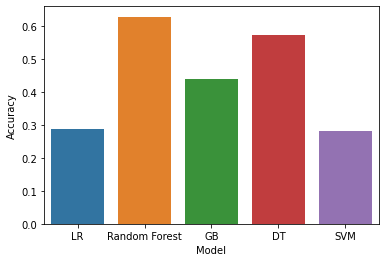

In [0]:
sns.barplot(x= 'Model',y='Accuracy',data=Result)


In [0]:
temp_data.head()

price  sqfeet  beds  ...  comes_furnished  laundry_options  parking_options
0    930    1252     3  ...                0                5                6
1    895    1118     2  ...                0                5                6
2    705     760     1  ...                0                5                6
3    850    1047     2  ...                0                3                7
4    825    1107     2  ...                0                5                6

[5 rows x 12 columns]

In [0]:
from sklearn.model_selection import  train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

X = temp_data.drop(['price'],axis=1)
y = temp_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

RF = RandomForestRegressor(n_estimators=1000, max_features='sqrt')

RF.fit(X_train,y_train)

output = RF.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, output))
print('MSE:', metrics.mean_squared_error(y_test, output))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,output)))

# test model score
metrics.explained_variance_score(y_test,output)

MAE: 137.22147793268712
MSE: 56600.683303604856
RMSE: 237.90898113271146


0.6406757940406679